In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set plot style
sns.set_style('whitegrid')

In [4]:
df = pd.read_csv('Mall_Customers.csv')
print(df.shape)
df.head(5)

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:


df.drop('CustomerID', axis=1, inplace=True)

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


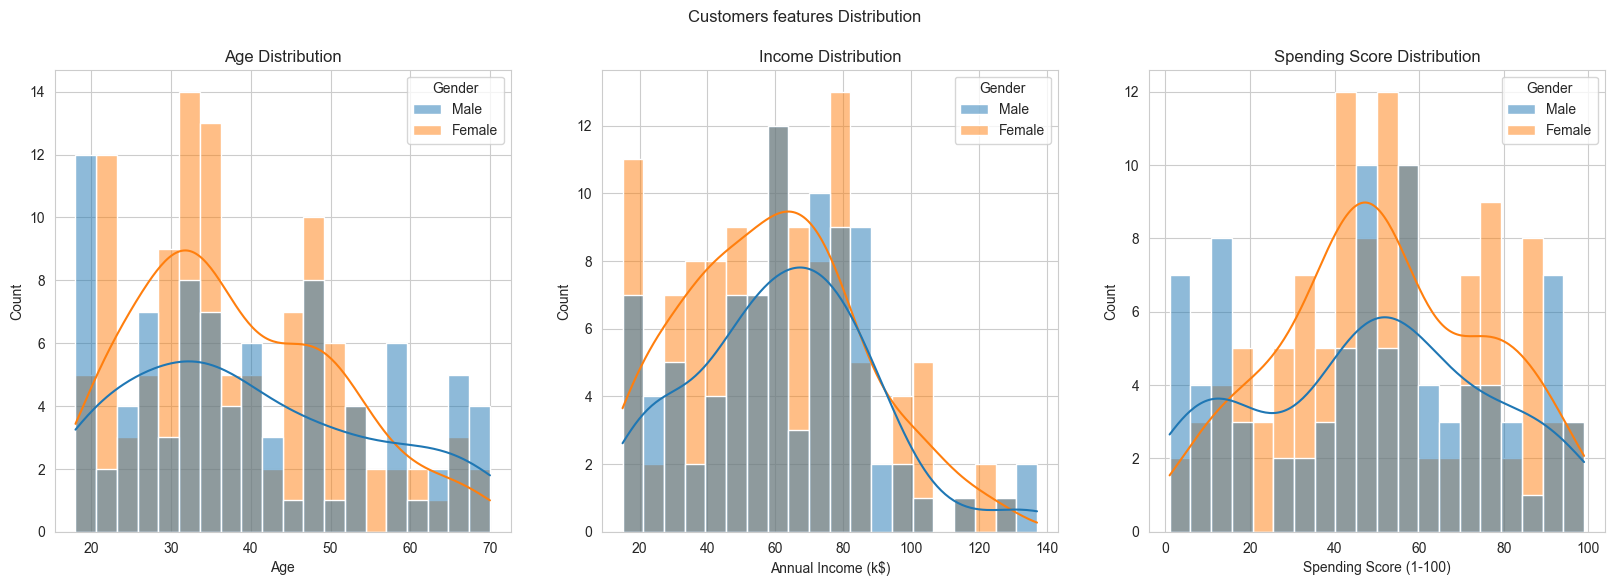

In [7]:
fig , axes = plt.subplots(1,3 , figsize=(20,6))

fig.suptitle('Customers features Distribution')

sns.histplot(ax = axes[0], data=df , x='Age' ,kde=True, bins=20,hue='Gender').set_title('Age Distribution')
sns.histplot(ax = axes[1], data=df , x='Annual Income (k$)' ,kde=True, bins=20,hue='Gender').set_title('Income Distribution')
sns.histplot(ax = axes[2], data=df , x='Spending Score (1-100)' ,kde=True, bins=20,hue='Gender').set_title('Spending Score Distribution')

plt.show()


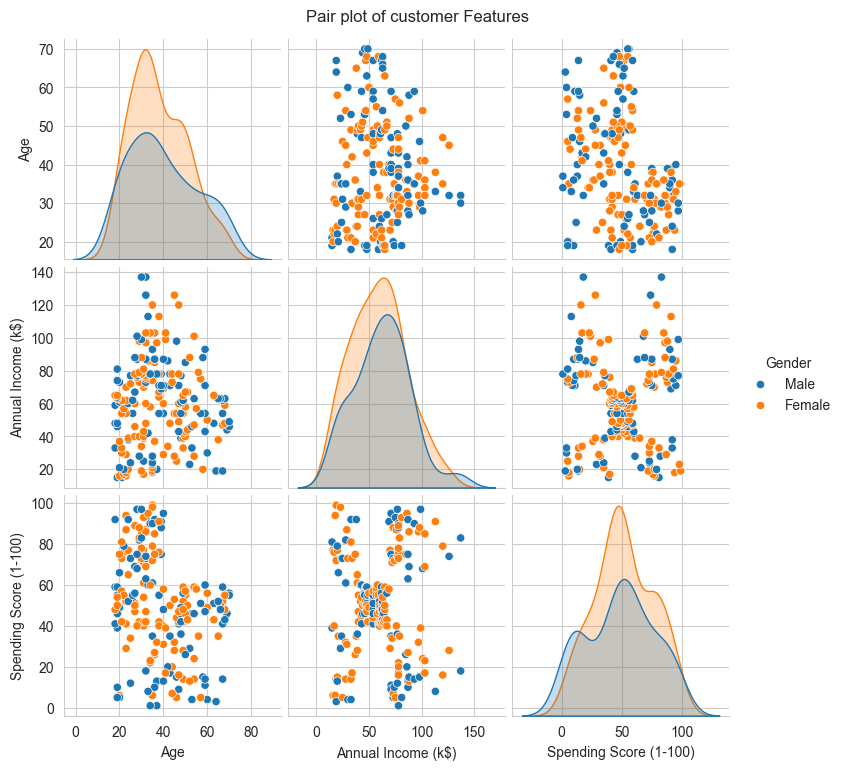

In [8]:
sns.pairplot(df , vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender', diag_kind='kde')
plt.suptitle('Pair plot of customer Features', y=1.02)
plt.show()

In [9]:
import plotly.express as px
fig = px.scatter_3d(df,
                    x='Annual Income (k$)',
                    y='Spending Score (1-100)',
                    z='Age',
                    color='Gender',
                    title='3D View of Customer Data')
fig.show()

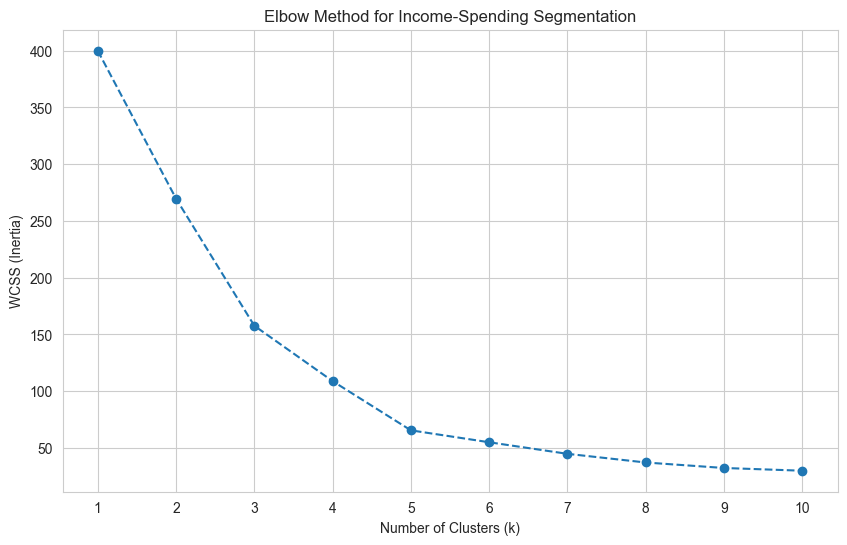

In [10]:
X1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

wcss1 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X1_scaled)
    wcss1.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss1, marker='o', linestyle='--')
plt.title('Elbow Method for Income-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

In [11]:
kmeans1 = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['Income_Cluster'] = kmeans1.fit_predict(X1_scaled)

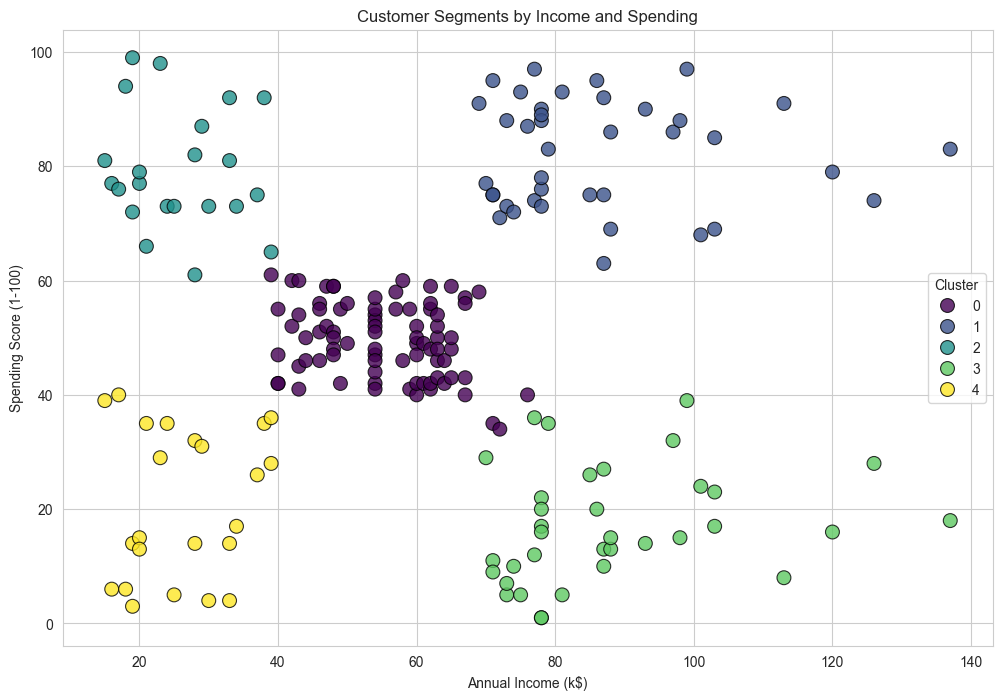

In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Income_Cluster', palette='viridis', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Income and Spending')
plt.legend(title='Cluster')
plt.show()

In [13]:
cluster_profiles1 = df.groupby('Income_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_profiles1['Size'] = df['Income_Cluster'].value_counts()
print("--- Income-Based Cluster Profiles ---")
cluster_profiles1

--- Income-Based Cluster Profiles ---


,Age,Annual Income (k$),Spending Score (1-100),Size
Income_Cluster,,,,
0,42.72,55.30,49.52,81
1,32.69,86.54,82.13,39
2,25.27,25.73,79.36,22
3,41.11,88.20,17.11,35
4,45.22,26.30,20.91,23


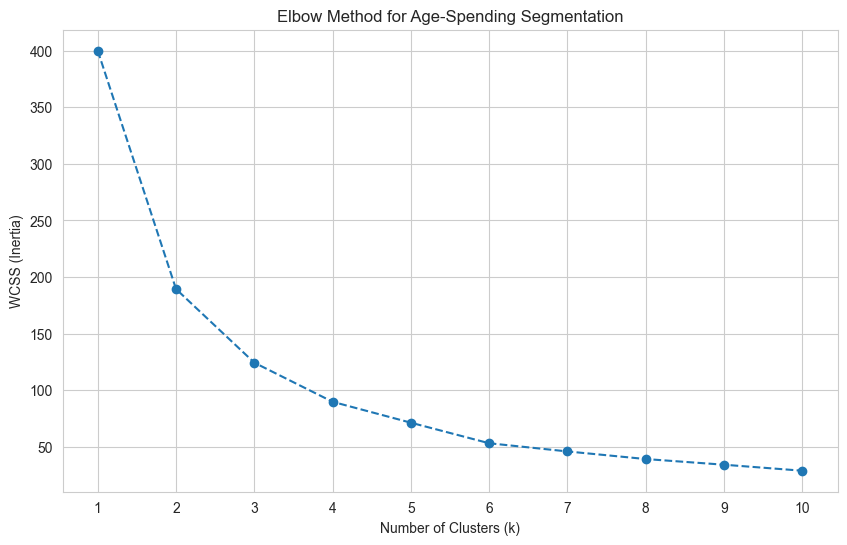

In [14]:
X2 = df[['Age', 'Spending Score (1-100)']]
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

wcss2 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X2_scaled)
    wcss2.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss2, marker='o', linestyle='--')
plt.title('Elbow Method for Age-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

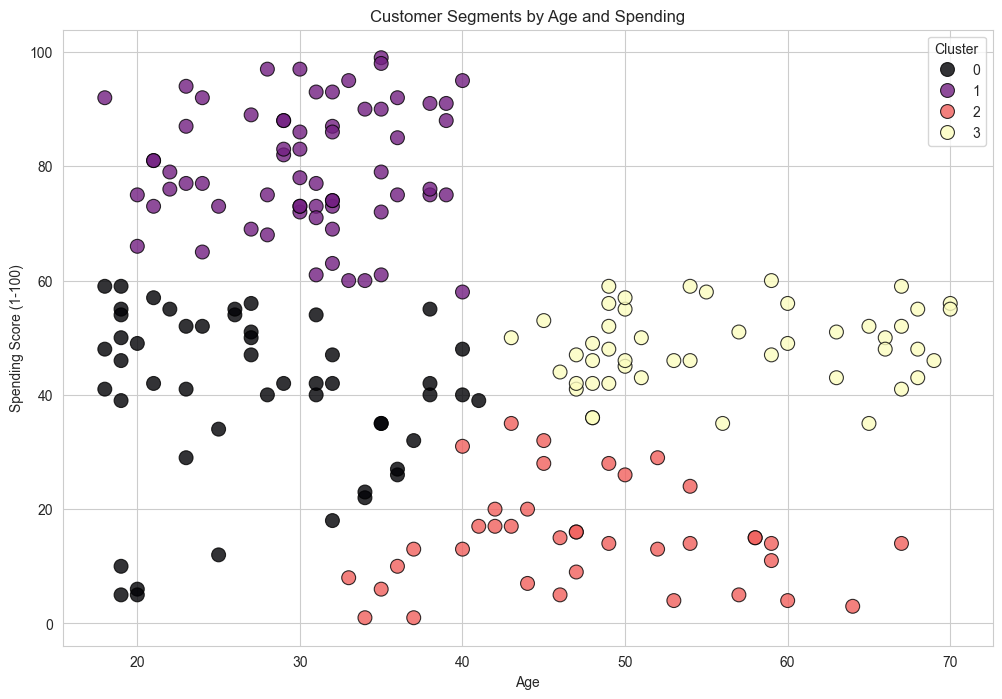

In [15]:
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df['Age_Cluster'] = kmeans2.fit_predict(X2_scaled)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)',
                hue='Age_Cluster', palette='magma', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Age and Spending')
plt.legend(title='Cluster')
plt.show()

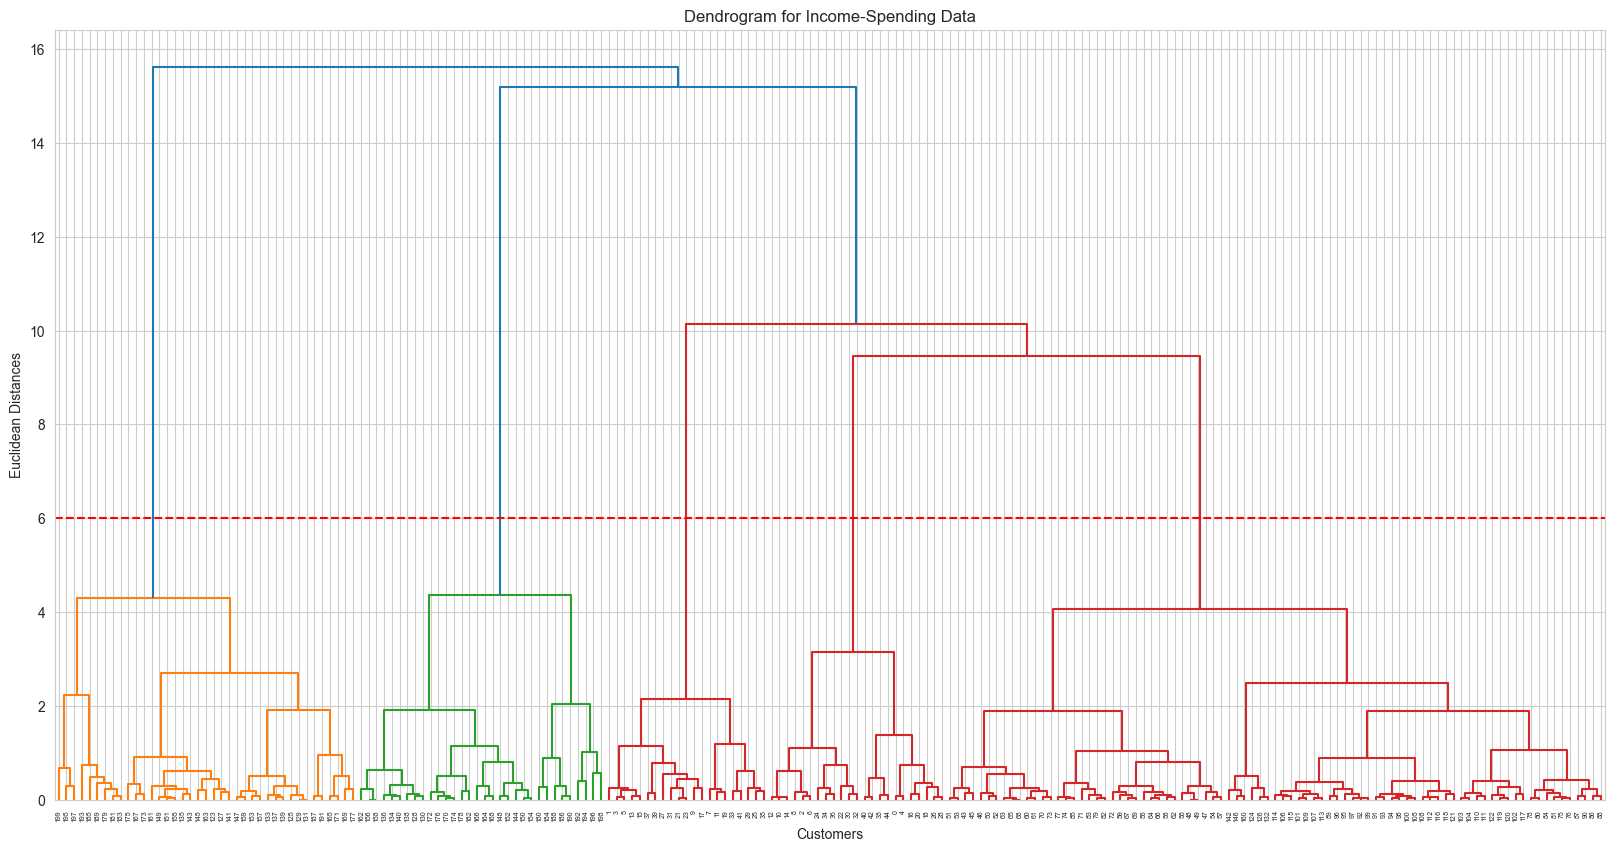

In [16]:
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X1_scaled, method='ward'))
plt.title('Dendrogram for Income-Spending Data')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=6, color='r', linestyle='--') # Example cut-off line
plt.show()

1.  **Explore Gender vs. Spending Score:** Analyze the relationship between 'Gender' and 'Spending Score (1-100)' to see if gender plays a significant role in spending habits. Visualizations and summary statistics would be helpful here.

In [17]:
gender_spending = df.groupby('Gender')['Spending Score (1-100)'].describe()
print(gender_spending)

        count       mean       std  min   25%   50%   75%   max
Gender                                                         
Female  112.0  51.526786  24.11495  5.0  35.0  50.0  73.0  99.0
Male     88.0  48.511364  27.89677  1.0  24.5  50.0  70.0  97.0


C:\Users\K. SHIVAIAH\AppData\Local\Temp\ipykernel_4796\2384613280.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




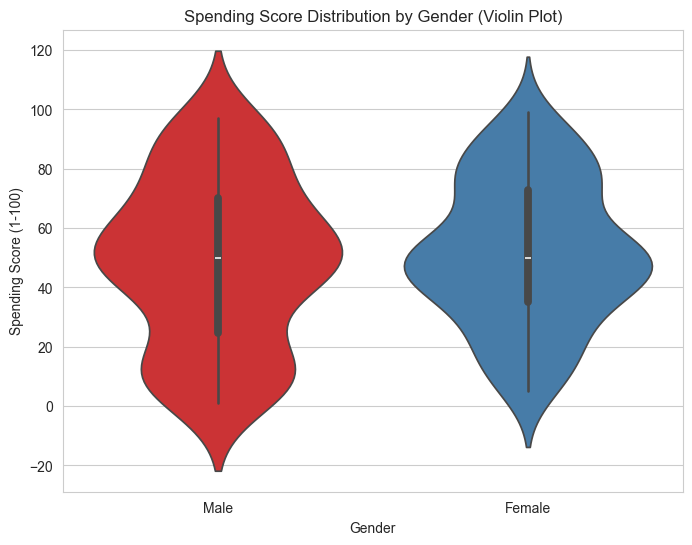

In [19]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='Gender', y='Spending Score (1-100)', palette='Set1')
plt.title('Spending Score Distribution by Gender (Violin Plot)')
plt.show()

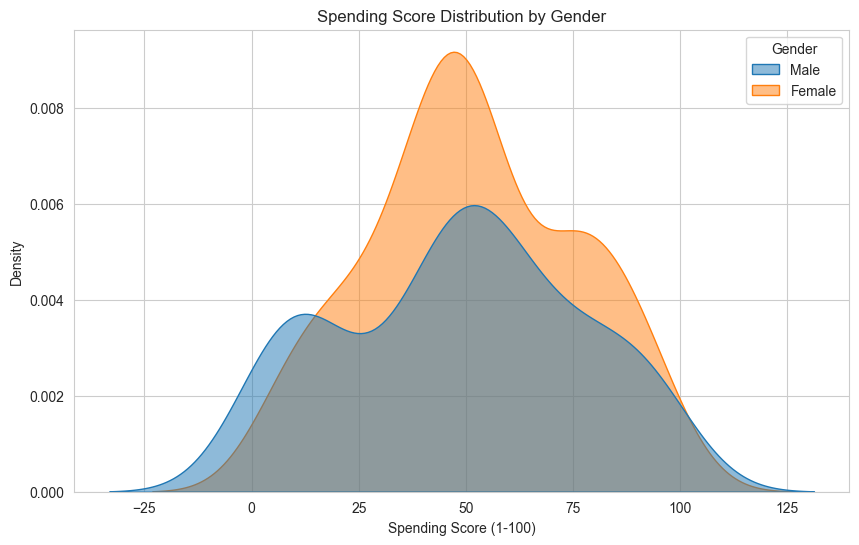

In [20]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Spending Score (1-100)', hue='Gender', fill=True, alpha=0.5)
plt.title('Spending Score Distribution by Gender')
plt.show()


In [21]:
from scipy.stats import ttest_ind

# Split spending scores by gender
male_spending = df[df['Gender']=='Male']['Spending Score (1-100)']
female_spending = df[df['Gender']=='Female']['Spending Score (1-100)']

# Independent t-test
t_stat, p_val = ttest_ind(male_spending, female_spending)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("✅ Significant difference: Gender affects spending score")
else:
    print("❌ No significant difference: Gender does not strongly affect spending score")


T-statistic: -0.8190464150660334
P-value: 0.4137446589852174
❌ No significant difference: Gender does not strongly affect spending score


2.  **Apply Feature Engineering for Clustering:** Create a new feature using existing data (Feature Engineering). Then, explore if clustering can be effectively performed using this newly engineered feature in combination with one or more existing features. Document the feature engineering process, the chosen features for clustering, the determination of the optimal number of clusters (e.g., using the Elbow Method), and the resulting cluster visualization and interpretation.

In [22]:
df['Income_per_Age'] = df['Annual Income (k$)'] / df['Age']
df[['Age', 'Annual Income (k$)', 'Income_per_Age']].head()

,Age,Annual Income (k$),Income_per_Age
0,19,15,0.789474
1,21,15,0.714286
2,20,16,0.800000
3,23,16,0.695652
4,31,17,0.548387


In [23]:
from sklearn.preprocessing import StandardScaler

X = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Income_per_Age']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5] 


array([[-1.73899919, -0.43480148, -1.01034449],
       [-1.73899919,  1.19570407, -1.08929603],
       [-1.70082976, -1.71591298, -0.99929128],
       [-1.70082976,  1.04041783, -1.10886228],
       [-1.66266033, -0.39597992, -1.26349878]])

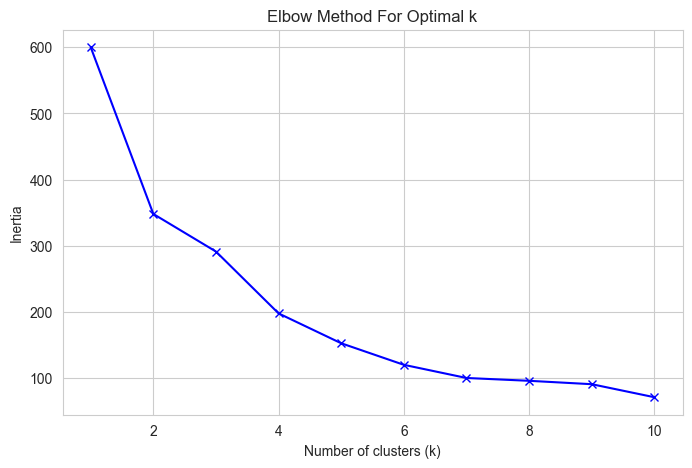

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [25]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

df[['Annual Income (k$)', 'Spending Score (1-100)', 'Income_per_Age', 'Cluster']].head()


,Annual Income (k$),Spending Score (1-100),Income_per_Age,Cluster
0,15,39,0.789474,0
1,15,81,0.714286,2
2,16,6,0.800000,0
3,16,77,0.695652,2
4,17,40,0.548387,0


In [26]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


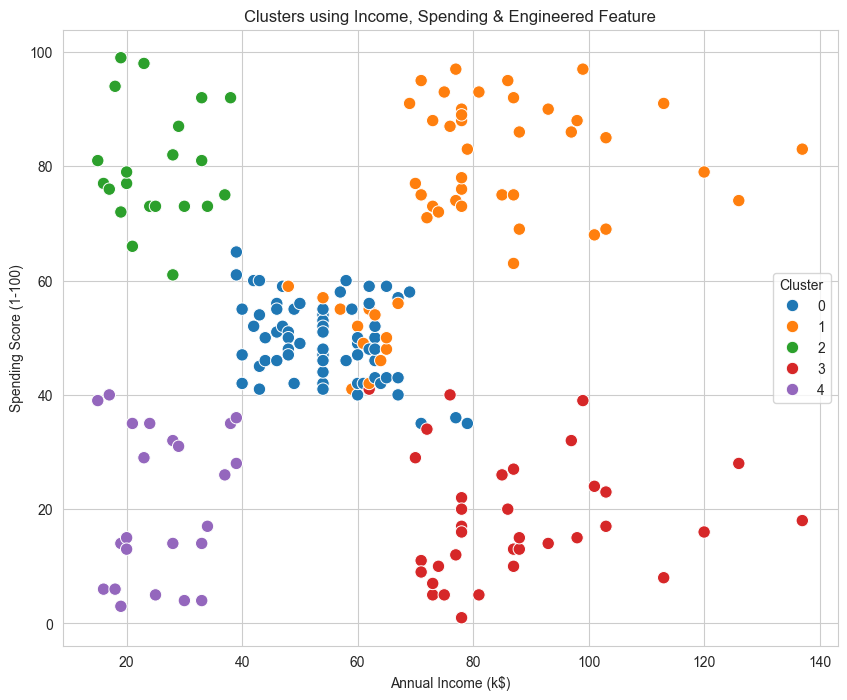

In [27]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='tab10',
    s=80
)
plt.title('Clusters using Income, Spending & Engineered Feature')
plt.show()


In [28]:
cluster_profiles = (
    df.groupby('Cluster')
      [['Age','Annual Income (k$)','Spending Score (1-100)','Income_per_Age']]
      .mean()
      .round(2)
)
cluster_profiles['Size'] = df['Cluster'].value_counts()
cluster_profiles


,Age,Annual Income (k$),Spending Score (1-100),Income_per_Age,Size
Cluster,,,,,
0,48.07,54.16,49.39,1.22,67
1,29.55,79.43,74.08,2.74,53
2,25.33,25.10,80.05,1.04,21
3,39.19,87.25,17.86,2.42,36
4,45.22,26.30,20.91,0.61,23
